In [1]:
import re
from itertools import starmap

import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


In [61]:
tokens = ["Comet", "is", "a", "great", "tool", "for", "Data", "Science", "!"]
labels_pred = [
    [0.33, 0.33, 0.34], # O
    [0.90, 0.10, 0.00], # O
    [0.00, 0.00, 1.00], # O
    [0.90, 0.10, 0.00], # O
    [0.05, 0.90, 0.05], # B-DAT
    [0.10, 0.50, 0.40], # B-DAT
    [0.00, 0.20, 0.80], # I-DAT
    [0.90, 0.10, 0.00], # O
    [0.00, 0.00, 1.00], # O
    [0.90, 0.10, 0.00], # O
    [0.05, 0.90, 0.05], # B-DAT
    [0.10, 0.50, 0.40], # B-DAT
]
labels_true = [
    [1.00, 0.00, 0.00], # O
    [1.00, 0.00, 0.00], # O
    [1.00, 0.00, 0.00], # O
    [1.00, 0.00, 0.00], # O
    [1.00, 0.00, 0.00], # O
    [1.00, 0.00, 0.00], # O
    [0.00, 1.00, 0.00], # B-DAT
    [0.00, 0.00, 1.00], # I-DAT
    [1.00, 0.00, 0.00], # O
]

In [46]:
def lbl_to_color(lbl):
    value =1 - lbl[0]
    saturation = max(lbl[1], lbl[2]) - min(lbl[1], lbl[2])
    BLUE = 240/360
    RED = 360/360
    hue = BLUE * lbl[1] + RED * lbl[2]
    return mcolors.hsv_to_rgb([hue, saturation, value])

In [63]:
colors_pred = list(map(lbl_to_color, labels_pred))
colors_true = list(map(lbl_to_color, labels_true))

In [59]:
# based on 
# https://stackoverflow.com/questions/36264305/matplotlib-multi-colored-title-text-in-practice
def color_text_figure(tokens, colors_true, colors_pred):
    f, ax = plt.subplots(figsize=(10, 1))
    ax.set_title("Top: Predicted, Bottom: True, Red:B-DAT, Blue:I-DAT, Black:O, Grey/White:Uncertain")
    r = f.canvas.get_renderer()
    ax.set_axis_off()
    space = 0.025
    w = 0.0
    for i, (token, color_true, color_pred) in enumerate(zip(tokens, colors_true, colors_pred)):
        t = ax.text(w, 0.25, token, color=color_true, ha="left", va="center", fontsize=18)
        ax.text(w, 0.75, token, color=color_pred, ha="left", va="center", fontsize=18)
        transf = ax.transData.inverted()
        bb = t.get_window_extent(renderer=f.canvas.renderer)
        bb = bb.transformed(transf)
        w = w + bb.xmax-bb.xmin + space
    return f

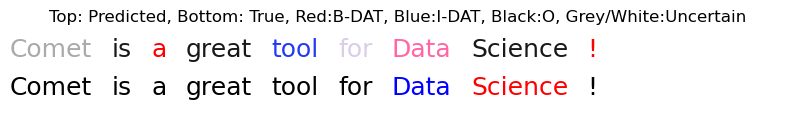

In [64]:
color_text_figure(tokens, colors_true, colors_pred)
plt.show()

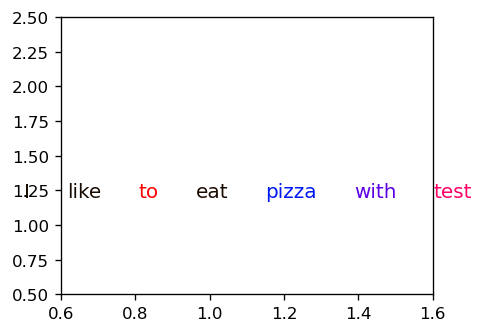

In [13]:
f = plt.figure(figsize=(4,3), dpi=120)
ax = f.add_subplot(111)

r = f.canvas.get_renderer()
space = 0.1
w = 0.5
counter = 0
for i in tokens:
    t = ax.text(w, 1.2, tokens[counter],color=colors[counter],fontsize=12,ha='left')
    transf = ax.transData.inverted()
    bb = t.get_window_extent(renderer=f.canvas.renderer)
    bb = bb.transformed(transf)
    w = w + bb.xmax-bb.xmin + space
    counter = counter + 1
plt.ylim(0.5,2.5)
plt.xlim(0.6,1.6)
plt.show()